In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Load the dataset
file_path = "test.csv"
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
df.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
5,fffe3600390032003200,2008-09-19,Male,Product,No,3.0,5.0,6.5
6,fffe3600370032003200,2008-01-16,Female,Service,Yes,2.0,3.0,4.7
7,fffe32003900390030003000,2008-02-10,Male,Service,No,2.0,5.0,8.5
8,fffe3100370031003000,2008-08-10,Male,Product,Yes,2.0,5.0,7.6
9,fffe31003500320037003600,2008-05-20,Male,Product,Yes,2.0,5.0,5.7


# Data Cleaning and Exploration

In [4]:
# Data Cleaning and Exploration
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64


# Summary statistics

In [5]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
         Designation  Resource Allocation  Mental Fatigue Score
count  12250.000000         12250.000000          12250.000000
mean       2.175265             4.458857              5.720571
std        1.132885             2.045602              1.914063
min        0.000000             1.000000              0.000000
25%        1.000000             3.000000              4.500000
50%        2.000000             4.000000              5.900000
75%        3.000000             6.000000              7.100000
max        5.000000            10.000000             10.000000


# Finding number of years employee worked

In [6]:
# Assuming 'df' is your DataFrame with columns 'date of Joining'
# Convert the date columns to datetime format if they are not already

df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])


# Function to calculate the duration
def calculate_duration(row):
    end_date = datetime.now()
    duration = end_date - row['Date of Joining']
    years = duration.days // 365
    months = (duration.days % 365) // 30
    days = (duration.days % 365) % 30

    return {'Years': years, 'Months': months, 'Days': days}

# Apply the function to each row
df['Years worked'] = df.apply(calculate_duration, axis=1)



# Display the DataFrame with the new 'Years worked' column
df


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Years worked
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7,"{'Years': 14, 'Months': 11, 'Days': 17}"
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2,"{'Years': 15, 'Months': 3, 'Days': 10}"
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9,"{'Years': 15, 'Months': 0, 'Days': 9}"
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6,"{'Years': 15, 'Months': 9, 'Days': 19}"
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4,"{'Years': 15, 'Months': 4, 'Days': 8}"
...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1,"{'Years': 15, 'Months': 1, 'Days': 21}"
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9,"{'Years': 15, 'Months': 7, 'Days': 26}"
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6,"{'Years': 15, 'Months': 9, 'Days': 14}"
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7,"{'Years': 15, 'Months': 9, 'Days': 20}"


# Histogram plot for the distribution of Mental Fatigue Score

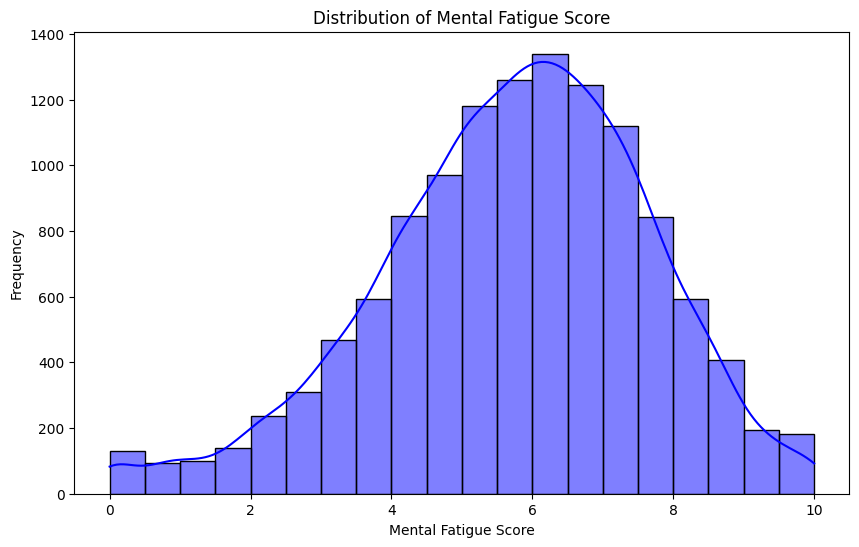

In [7]:
# Data Visualization
# Plotting the distribution of Mental Fatigue Score

plt.figure(figsize=(10, 6))
sns.histplot(df['Mental Fatigue Score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Company Type Service vs Product

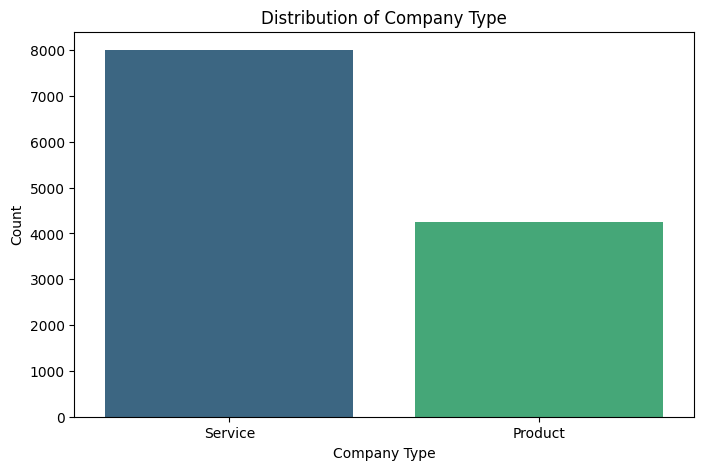

In [8]:
# Bar plot for Company Type
#Service vs Product

plt.figure(figsize=(8, 5))
sns.countplot(x='Company Type', data=df, palette='viridis')
plt.title('Distribution of Company Type')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.show()

# Bar plot for Gender Male vs Female

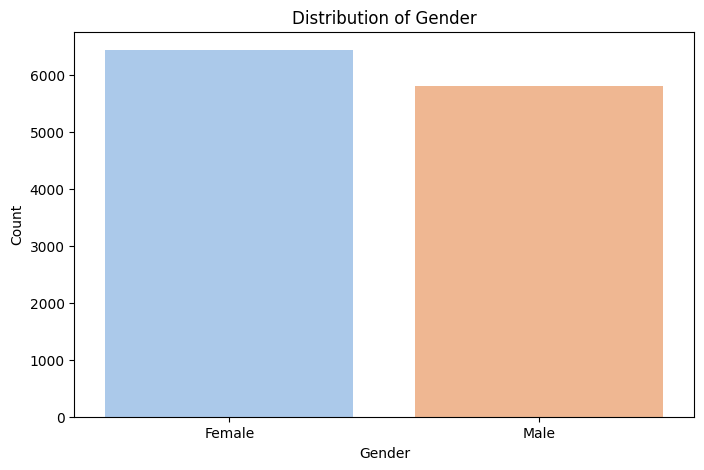

In [9]:
# Count plot for Gender
# male vs female

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Box plot for Resource Allocation by Company Type

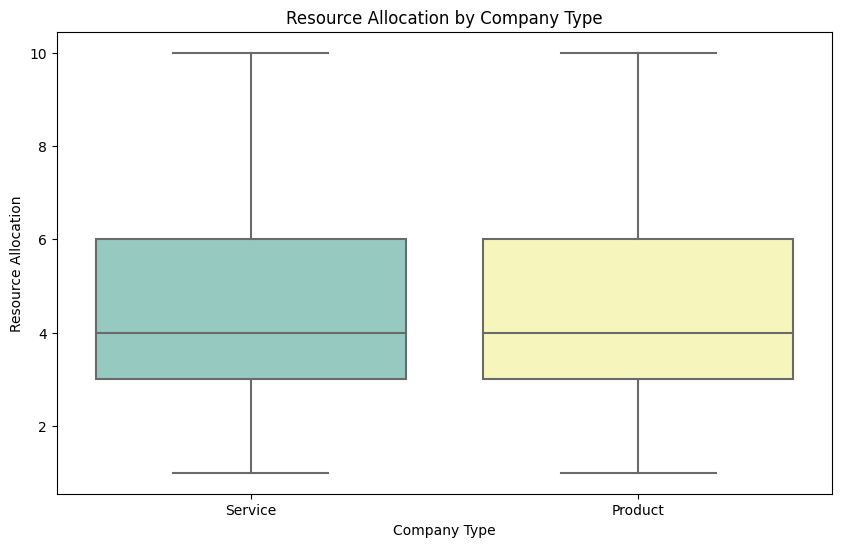

In [10]:
# Box plot for Resource Allocation by Company Type

plt.figure(figsize=(10, 6))
sns.boxplot(x='Company Type', y='Resource Allocation', data=df, palette='Set3')
plt.title('Resource Allocation by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Resource Allocation')
plt.show()

# Correlation matrix Heatmap

<ipython-input-11-4aaf53e6d0d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


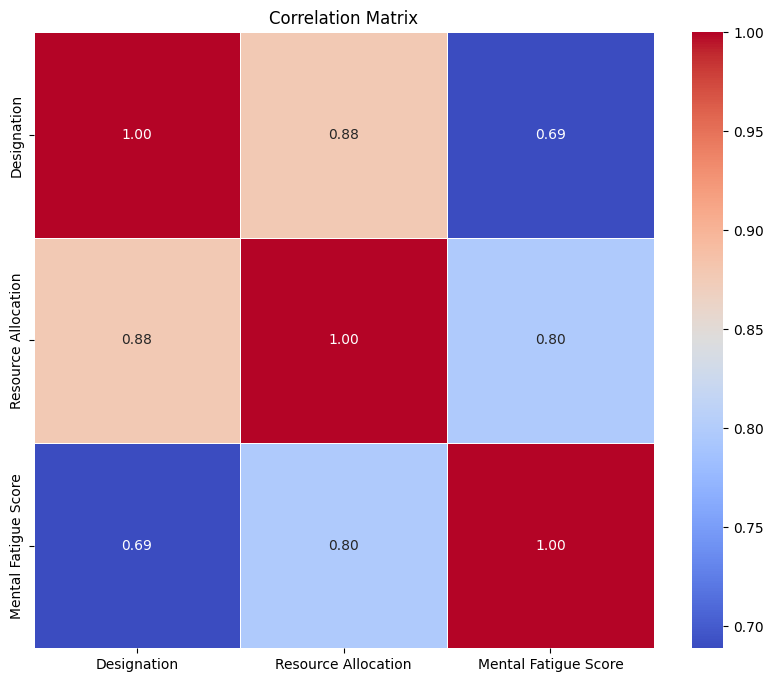

In [11]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot for numerical variables

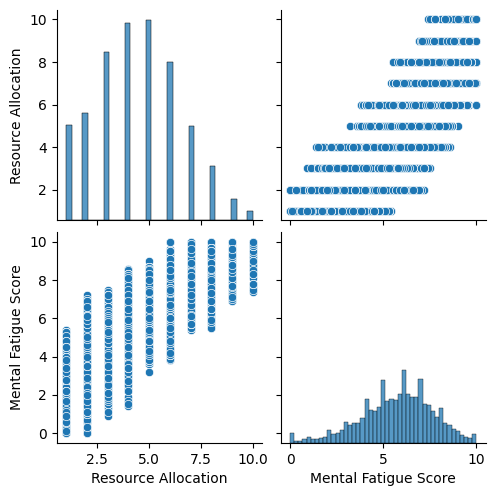

In [12]:
# Pairplot for numerical variables

sns.pairplot(df[['Resource Allocation', 'Mental Fatigue Score']])
plt.show()

# Bar plot for number of employess joined in each month over the year of 2008

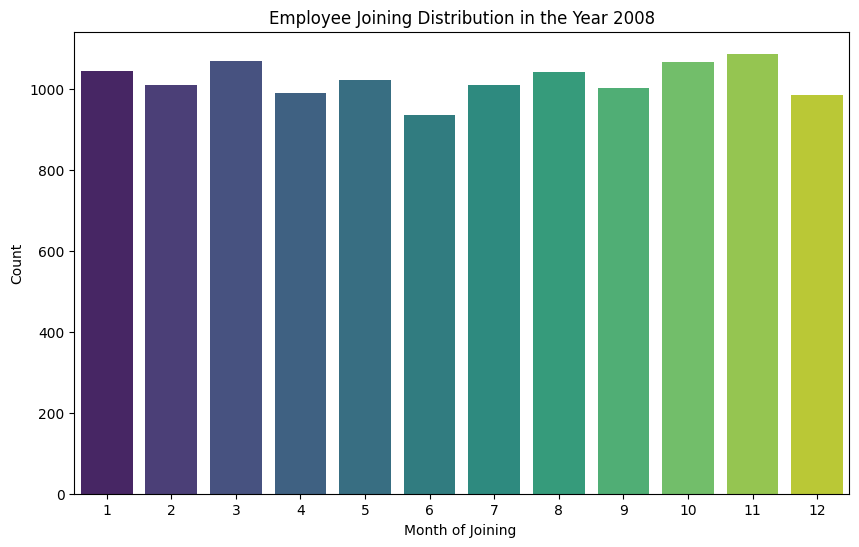

In [13]:
# Date of Joining - Time Series Analysis
# barplot for number of employess joined in each month over the year of 2008
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Joining Month'] = df['Date of Joining'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(x='Joining Month', data=df, palette='viridis')
plt.title('Employee Joining Distribution in the Year 2008')
plt.xlabel('Month of Joining ')
plt.ylabel('Count')
plt.show()

# Pie chart for Designation in the company

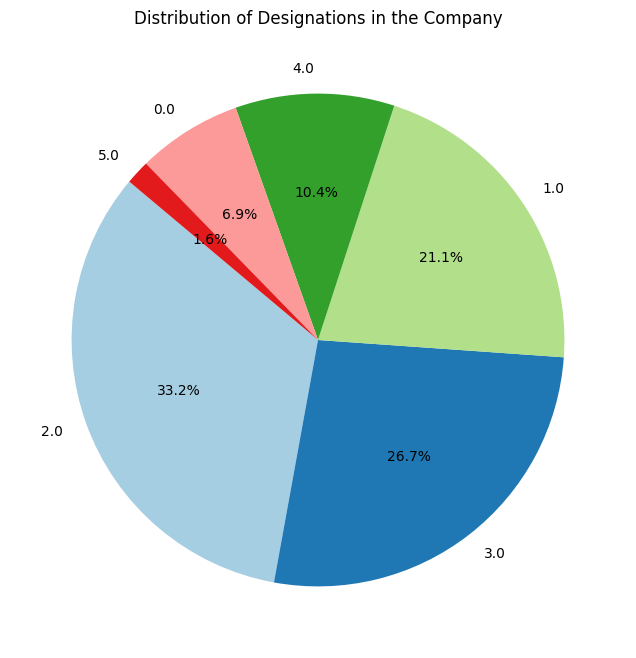

0.0     842
1.0    2586
2.0    4073
3.0    3276
4.0    1278
5.0     195
Name: Designation, dtype: int64

In [14]:
# Create a pie chart

designation_counts = df['Designation'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(designation_counts, labels=designation_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Designations in the Company')
plt.show()
designation_counts.sort_index()

# T-test for WFH Impact on Mental Fatigue

In [15]:
# Assuming 'WFH Setup Available' is encoded as 0 and 1
wfh_group = df[df['WFH Setup Available'] == 1]['Mental Fatigue Score']
no_wfh_group = df[df['WFH Setup Available'] == 0]['Mental Fatigue Score']

# Perform t-test
t_stat, p_value = ttest_ind(wfh_group, no_wfh_group)

print(f'T-test for WFH Impact on Mental Fatigue:')


# Interpret the results
if p_value < 0.05:
    print('There is a significant difference in Mental Fatigue scores between WFH and non-WFH groups.')
else:
    print('There is no significant difference in Mental Fatigue scores between WFH and non-WFH groups.')


T-test for WFH Impact on Mental Fatigue:
There is no significant difference in Mental Fatigue scores between WFH and non-WFH groups.


# Chi-square test for Gender distribution

In [16]:
# hypothesis on gender distribution

gender_contingency_table = pd.crosstab(df['Gender'], columns='count')
chi2, p, _, _ = chi2_contingency(gender_contingency_table)

print(f'Chi-square test for Gender distribution:')
print(f'Chi2 value: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print('Reject the null hypothesis. There is a significant difference in gender distribution.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in gender distribution.')


Chi-square test for Gender distribution:
Chi2 value: 0.0
P-value: 1.0
Fail to reject the null hypothesis. There is no significant difference in gender distribution.


# T-test for Company Type impact on Resource Allocation

In [17]:
#Hypothesis on the Impact of Company Type on Resource Allocation:

company_type_1 = df[df['Company Type'] == 'Type1']['Resource Allocation']
company_type_2 = df[df['Company Type'] == 'Type2']['Resource Allocation']

t_stat, p_value = ttest_ind(company_type_1, company_type_2)

print(f'T-test for Company Type impact on Resource Allocation:')

if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant difference in resource allocation between company types.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in resource allocation between company types.')


T-test for Company Type impact on Resource Allocation:
Fail to reject the null hypothesis. There is no significant difference in resource allocation between company types.


# Pearson correlation test

In [18]:
#Hypothesis on the Correlation between Resource Allocation and Mental Fatigue Score:

correlation, p_value = pearsonr(df['Resource Allocation'], df['Mental Fatigue Score'])

print(f'Pearson correlation test:')
print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant correlation between resource allocation and mental fatigue score.')
else:
    print('Fail to reject the null hypothesis. There is no significant correlation between resource allocation and mental fatigue score.')


Pearson correlation test:
Correlation coefficient: 0.7978270822115985
P-value: 0.0
Reject the null hypothesis. There is a significant correlation between resource allocation and mental fatigue score.


#T-test for Mental Fatigue Score between Male and Female employees

In [19]:
# performing t-test
# Assuming 'Gender' has two categories: 'Male' and 'Female'

group_male = df[df['Gender'] == 'Male']['Mental Fatigue Score']
group_female = df[df['Gender'] == 'Female']['Mental Fatigue Score']

# Perform t-test
t_stat, p_value = ttest_ind(group_male, group_female, equal_var=False)  # Assuming unequal variance

print(f'T-test for Mental Fatigue Score between Male and Female employees:')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis. There is a significant difference in Mental Fatigue Score between Male and Female employees.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in Mental Fatigue Score between Male and Female employees.')


T-test for Mental Fatigue Score between Male and Female employees:
T-statistic: 16.1954057534529
P-value: 2.2277005077942426e-58
Reject the null hypothesis. There is a significant difference in Mental Fatigue Score between Male and Female employees.


# One-way ANOVA for Designation and Mental Fatigue Score

One-way ANOVA results:
Fail to reject the null hypothesis. There is no significant difference in Mental Fatigue Score among different Designations.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


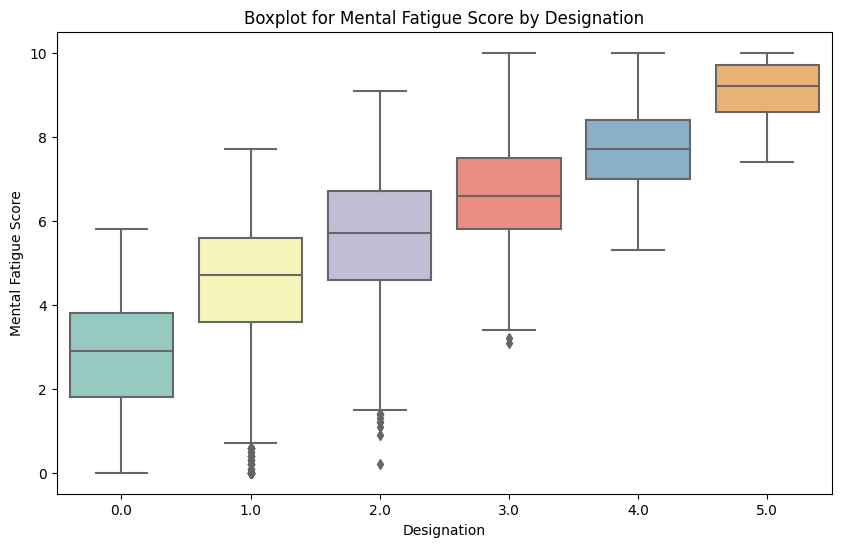

In [20]:
# One-way ANOVA for 'Designation' and 'Mental Fatigue Score'

f_statistic, p_value = f_oneway(df['Mental Fatigue Score'][df['Designation'] == 'Senior'],
                                 df['Mental Fatigue Score'][df['Designation'] == 'Mid'],
                                 df['Mental Fatigue Score'][df['Designation'] == 'Junior'])

print(f'One-way ANOVA results:')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in Mental Fatigue Score among different Designations.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in Mental Fatigue Score among different Designations.')

# Boxplot for 'Designation' vs 'Mental Fatigue Score'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Designation', y='Mental Fatigue Score', data=df, palette='Set3')
plt.title('Boxplot for Mental Fatigue Score by Designation')
plt.show()

# Independent Sample T-test

Independent Sample T-test results:
Fail to reject the null hypothesis. There is no significant difference in Mental Fatigue Score between different Company Types.


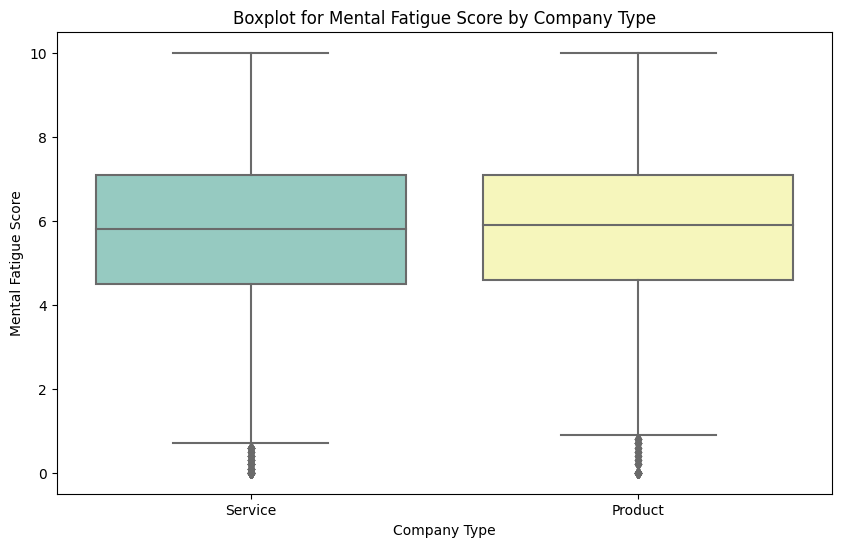

In [21]:
# Independent Sample T-test for 'Company Type' and 'Mental Fatigue Score'

company_type_1 = df[df['Company Type'] == 'Type1']['Mental Fatigue Score']
company_type_2 = df[df['Company Type'] == 'Type2']['Mental Fatigue Score']

t_stat, p_value = ttest_ind(company_type_1, company_type_2, equal_var=False)  # Assuming unequal variance

print(f'Independent Sample T-test results:')
#print(f'T-statistic: {t_stat}')
#print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in Mental Fatigue Score between different Company Types.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in Mental Fatigue Score between different Company Types.')

# Boxplot for 'Company Type' vs 'Mental Fatigue Score'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company Type', y='Mental Fatigue Score', data=df, palette='Set3')
plt.title('Boxplot for Mental Fatigue Score by Company Type')
plt.show()

# Simple Linear Regression

Mean Squared Error: 1.3077171492860806


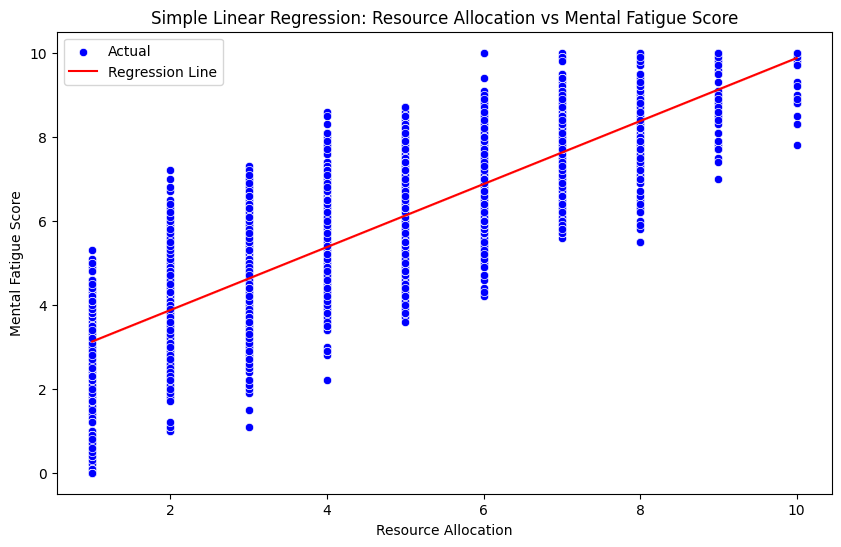

In [22]:
# Simple Linear Regression
X = df[['Resource Allocation']]  # Independent variable
y = df['Mental Fatigue Score']    # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Resource Allocation'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['Resource Allocation'], y=y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Resource Allocation vs Mental Fatigue Score')
plt.xlabel('Resource Allocation')
plt.ylabel('Mental Fatigue Score')
plt.legend()
plt.show()

# Scatter plot for Principal Component vs Mental Fatigue Score


Explained Variance Ratio: [0.89891354]


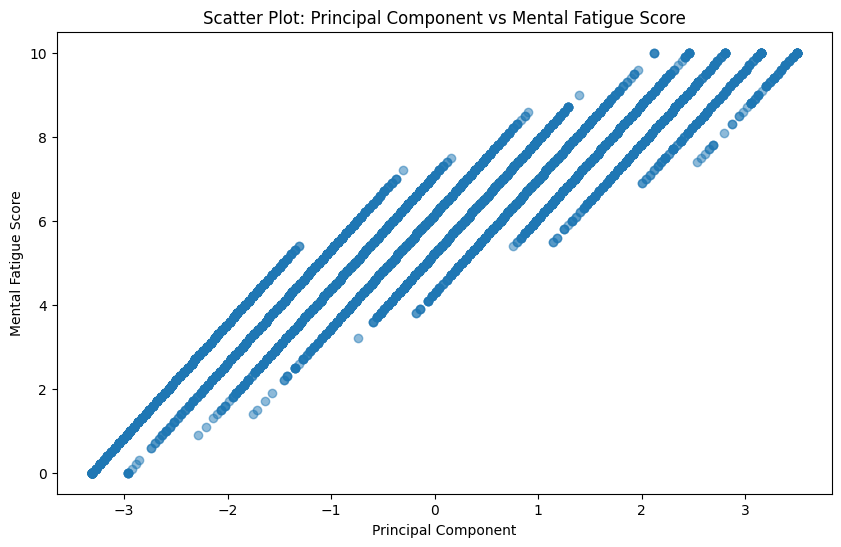

In [23]:
# Select relevant features for PCA
features = df[['Resource Allocation', 'Mental Fatigue Score']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=1)  # Choose the number of components
principal_components = pca.fit_transform(features_standardized)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['Principal Component'])

# Concatenate the principal components with the original dataset
final_df = pd.concat([df, pc_df], axis=1)

# Display the results
#print("Original Dataset:")
#print(df.head())
#print("\nDataset after PCA:")
#print(final_df.head())

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:", explained_variance_ratio)

# Scatter plot of the principal component against the original variables
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Principal Component'], final_df['Mental Fatigue Score'], alpha=0.5)
plt.title('Scatter Plot: Principal Component vs Mental Fatigue Score')
plt.xlabel('Principal Component')
plt.ylabel('Mental Fatigue Score')
plt.show()

# Add probabilities to the DataFrame

In [24]:
# Select relevant features and target variable
features = df[['Mental Fatigue Score', 'Resource Allocation']]
target = df['WFH Setup Available']  # Assuming 'WFH Setup Available' is the target variable

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_rep)

# Predict the probabilities for each class (0: No WFH, 1: WFH)
probabilities = model.predict_proba(features_standardized)

# Add probabilities to the DataFrame
df['Probability_WFO'] = probabilities[:, 0]
df['Probability_WFH'] = probabilities[:, 1]

# Display the results
print('\nUpdated DataFrame with Probabilities:')
df[['Mental Fatigue Score', 'Resource Allocation', 'WFH Setup Available', 'Probability_WFO', 'Probability_WFH']]


Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

          No       0.66      0.60      0.63      1123
         Yes       0.68      0.73      0.71      1327

    accuracy                           0.67      2450
   macro avg       0.67      0.67      0.67      2450
weighted avg       0.67      0.67      0.67      2450


Updated DataFrame with Probabilities:


,Mental Fatigue Score,Resource Allocation,WFH Setup Available,Probability_WFO,Probability_WFH
0,7.7,5.0,No,0.573566,0.426434
1,5.2,2.0,Yes,0.339254,0.660746
2,5.9,3.0,Yes,0.407959,0.592041
3,4.6,6.0,No,0.456822,0.543178
4,6.4,5.0,No,0.508780,0.491220
...,...,...,...,...,...
12245,6.1,2.0,Yes,0.380900,0.619100
12246,5.9,4.0,Yes,0.445495,0.554505
12247,9.6,7.0,No,0.728166,0.271834
12248,6.7,6.0,No,0.561916,0.438084
